# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [13]:
# Creation of the DataFrame

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,20], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}, index=[1,2,3,4,5,6,7,8,9,10])

Draw a dispersion diagram (scatter plot) for the data.

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


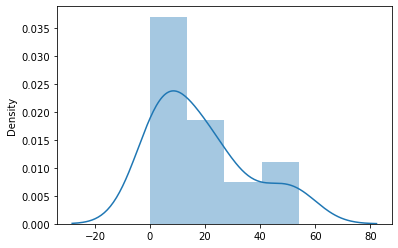

In [18]:
# sns.distplot()

_ = sns.distplot(student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [19]:
# As axis x increases (age) the density of the distribution decreases
# We can somehow see that it seems that there is a negative correlation between age and tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [31]:
print(f'The correlation between Age and Tardies is {round(student_data.corr().iloc[0,1], 4)}')
print(f'The covariance between Age and Tardies is {round(student_data.cov().iloc[0,1],4)}')

The correlation between Age and Tardies is -0.8588
The covariance between Age and Tardies is -43.4556


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

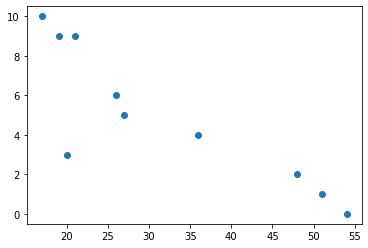

In [70]:
# By making a scatterplot, we can visually see that it can be a linear relaitonship

plt.scatter(x =x, y=y)

In [48]:
# Define variables

x = student_data['Age']
X = sm.add_constant(x)
y=student_data['Tardies']

In [69]:
# Method 1: using stats.lineregress

slope = stats.linregress(x, y)[0]
intercept = stats.linregress(x, y)[1]

def prediction (x):
    return intercept + slope * x

In [71]:
# Method 2: using sm.OLS

model = sm.OLS(y,X).fit()
model.summary()

C:\Users\carlo\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     22.48
Date:                Sat, 12 Jun 2021   Prob (F-statistic):            0.00146
Time:                        17:09:10   Log-Likelihood:                -19.620
No. Observations:                  10   AIC:                             43.24
Df Residuals:                       8   BIC:                             43.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6919      1.556      7.512      0.000       8.103      15.281
Age           -0.2129      0.045     -4.742      0.001      -0.316      -0.109
==============================================================================
Omnibus:                       10.588   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.609
Skew:                          -1.423   Prob(JB):                       0.0998
Kurtosis:                       4.721   Cond. No.                         88.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

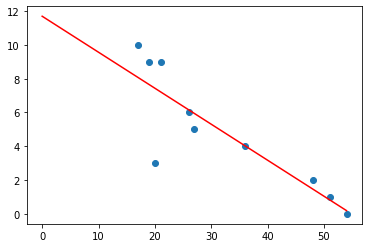

In [77]:
# Use 2 layers: scatterplot with real observations, and plot with our Linear Regression model

plt.scatter(x =x, y=y)
plt.plot([0, x.max()], [intercept, x.max() * slope + intercept], color='red')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# We can assume that tardies do decrease as students are older
# The R-squared value from our OLS model is 0.738. The age can be a good predictor but it seems that there is an elevated amount of residual when the student is young 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [83]:
# import vehicles dataset

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [149]:
# Defining variables

X = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

pd.concat([y, X], axis=1).corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [150]:
# If we consider the correlation matrix, Fuel Barrels/Year is the variables will be the most important in determining CO2 emissions

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [151]:
# Import Linear regression
from sklearn.linear_model import LinearRegression

# Use Linear Regression
model1 = LinearRegression()

# Train
model1.fit(X,y)

# Makes the prediction and compares it with the real variable
model1.score(X,y)

0.9808734920269122

In [152]:
# Check the coefficients to see the weight each value has
# We can see there is too much differences between coefficients
# We will try the same emthod but scalinf the variables in the first place
model1.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [153]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Scale the necessary avriables
vehicles_scaled = StandardScaler().fit_transform(pd.concat([y, X], axis=1))

# Define enw scales variables
Z = vehicles_scaled[:,1:6]
w = vehicles_scaled[:,0]

# Use Linear Regression
model2 = LinearRegression()

# Train
model2.fit(Z,w)

# Makes the prediction and compares it with the real variable
# We have the same score value than the previous model
model2.score(Z,w)

0.9808734920269122

In [154]:
# We have coefficients with a value between -1 and 1
model2.coef_

array([-0.0271585 ,  0.02769844,  0.71488535, -0.1305532 ,  0.13757318])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# As we had forecasted when making the correlation matrix, Fuel Barrel per Year is the variable with the highest coefficient 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [157]:
# Create the DataFrame

party = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

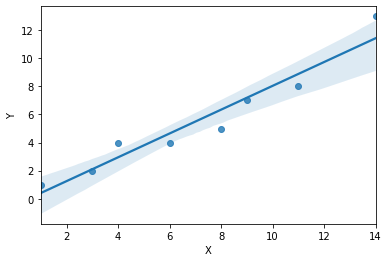

In [162]:
# sns.regplot()

sns.regplot(data = party, x='X', y='Y')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [165]:
# The two variables are possitively correlated. It seems obvious that as much people invited, more attendants will come

# Define variables

X = sm.add_constant(party['X'])
y = party['Y']

# Linear Regression Model
model1 = LinearRegression()
model1.fit(X, y)
model1.score(X, y)

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [166]:
# It seems that there are 3 observation that do not match the 95% condfidence interval.
# I create an other dataframe without the outliers

party2 = pd.DataFrame({'X': [1,3,6,9,11], 'Y': [1,2,4,7,8]})
party2

# Define variables

Z = sm.add_constant(party2['X'])
w = party2['Y']

# Linear Regression Model
model2 = LinearRegression()
model2.fit(Z, w)
model2.score(Z, w)

0.9882985452245414

<AxesSubplot:xlabel='X', ylabel='Y'>

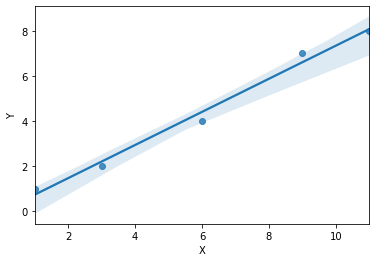

In [167]:
sns.regplot(data = party2, x='X', y='Y')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# The score is a little bit higher
# In the new regplot there is a new osbervation that do not match the 95% condfidence interval.